# Convolutional neural network setup



In [1]:
## Start off with the required imports.

from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

In [2]:
#Data importing
dataset = pd.read_csv("C:\\Users\\maxhi\\OneDrive\\Desktop\\CNN\\A_Z Handwritten Data.csv").astype('float32')

dataset.rename(columns={'0':'label'}, inplace=True)

# Splite data the X - Our data , and y - the prdict label
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [3]:
#lets first inspect the data
print('data shape:', X.shape)
print('collumns:',len(X.iloc[1]))

X.head()

data shape: (372450, 784)
collumns: 784


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


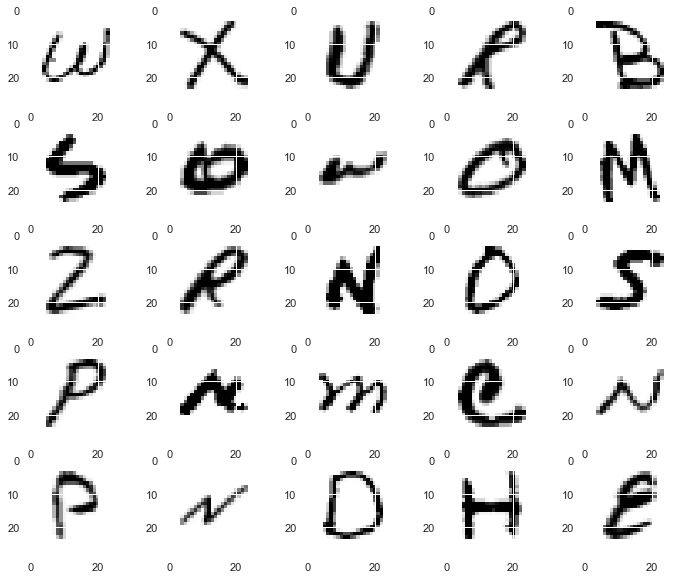

In [4]:
##time to inspect the letters
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 5, 5
for i in range(25):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [5]:
#Random copy to be safe
data_alphabet = dataset.copy()

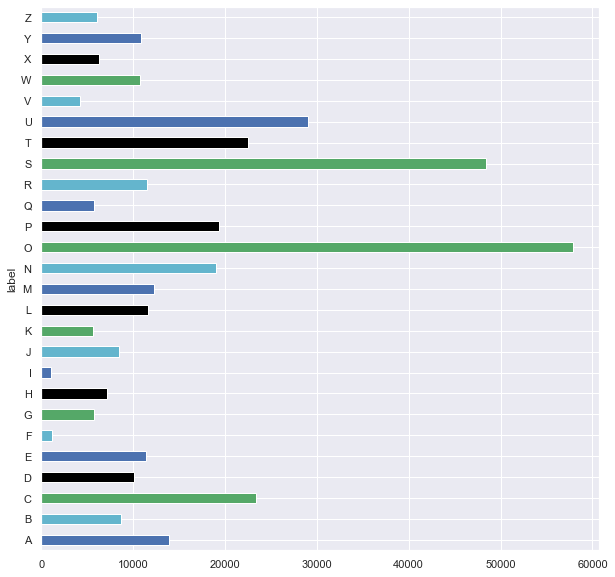

In [6]:
#Here we build the labels and safely copy the data set

alphabet_keys = {0:'A',1:'B',2:'C', 3:'D',4:'E',5:'F',6:'G', 7:'H',8:'I',9:'J', 
             10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S',
            19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}
visual_data = dataset.copy()
visual_data['label'] = visual_data['label'].map(alphabet_keys)

my_color = ['b','c','g','black']
label_freq = visual_data.groupby('label').size()
label_freq.plot.barh(figsize=(10,10), color=my_color)
plt.show()



In [7]:
#check out the labels with high and low values, or atleast get a table with size
print(label_freq)

label
A    13869
B     8668
C    23409
D    10134
E    11440
F     1163
G     5762
H     7218
I     1120
J     8493
K     5603
L    11586
M    12336
N    19010
O    57825
P    19341
Q     5812
R    11566
S    48419
T    22495
U    29008
V     4182
W    10784
X     6272
Y    10859
Z     6076
dtype: int64


In [8]:
#This section covers dividing the data into 
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data to 0 and 1. 
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)



X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [9]:
#clearly see that the value are between 0,1
print(X_train)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Data after scaler


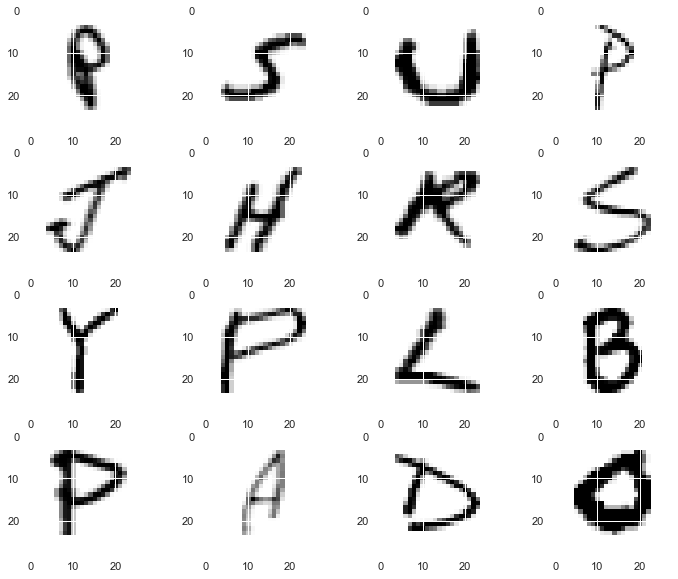

In [10]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
cnn = models.Sequential()
cnn.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(len(y.unique()), activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = cnn.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
1397/1397 - 50s - loss: 0.2250 - accuracy: 0.9374 - val_loss: 0.0878 - val_accuracy: 0.9754 - 50s/epoch - 35ms/step
Epoch 2/18
1397/1397 - 44s - loss: 0.0854 - accuracy: 0.9758 - val_loss: 0.0638 - val_accuracy: 0.9824 - 44s/epoch - 31ms/step
Epoch 3/18
1397/1397 - 42s - loss: 0.0643 - accuracy: 0.9815 - val_loss: 0.0543 - val_accuracy: 0.9847 - 42s/epoch - 30ms/step
Epoch 4/18
1397/1397 - 42s - loss: 0.0525 - accuracy: 0.9850 - val_loss: 0.0478 - val_accuracy: 0.9863 - 42s/epoch - 30ms/step
Epoch 5/18
1397/1397 - 47s - loss: 0.0435 - accuracy: 0.9870 - val_loss: 0.0441 - val_accuracy: 0.9875 - 47s/epoch - 33ms/step
Epoch 6/18
1397/1397 - 46s - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0407 - val_accuracy: 0.9890 - 46s/epoch - 33ms/step
Epoch 7/18
1397/1397 - 45s - loss: 0.0308 - accuracy: 0.9906 - val_loss: 0.0412 - val_accuracy: 0.9884 - 45s/epoch - 32ms/step
Epoch 8/18
1397/1397 - 44s - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.0350 - val_accuracy: 0.9906 - 44s/ep

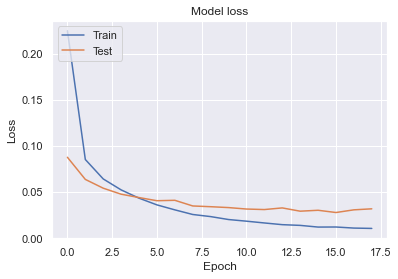

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<AxesSubplot:>

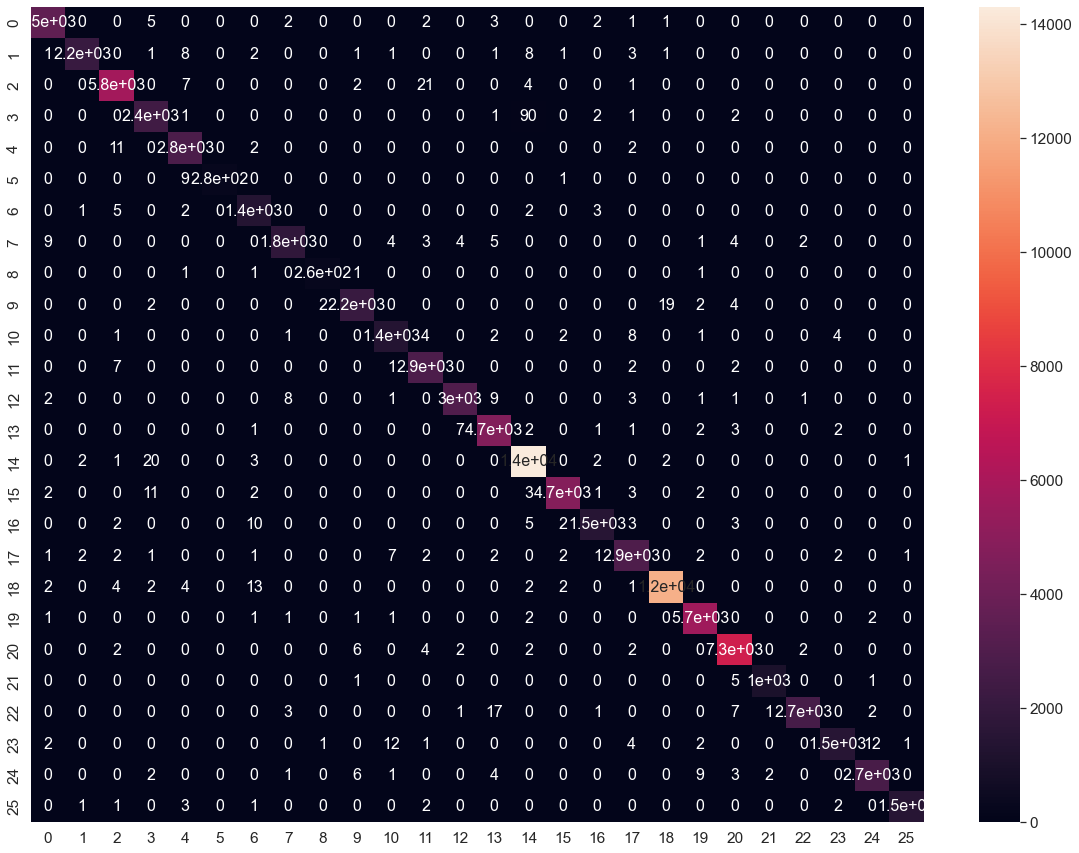

In [15]:
cm=confusion_matrix(y_test.argmax(axis=1),cnn.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [ ]:
#Saving the model and extracting it
!pip install --upgrade pip


cnn.save('cnn_model.h5')

output_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


In [ ]:
#Start of the neural network model.
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))